In [131]:
import seaborn as sns
diamonds = sns.load_dataset("diamonds")
df = diamonds.copy()
df = df.select_dtypes(include = ['float64','int64'])
df.head()                                 

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [0]:
df_table = df["table"].copy()

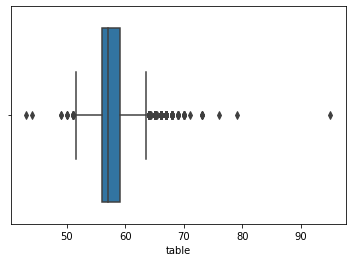

In [133]:
sns.boxplot(x = df_table)
# boxplot özelliğinde en düşük ve en yüksek değer çizgiyle belirtilmiştir.
# bu çi<gilerin dışı aykırı gözlem olarak kabul edilir.

In [0]:
# interquantile range yöntemiyle aykırı gözlemlerin eşik değerini hesaplayacağız.

In [135]:
# quantile fonksiyonu, değerler küçükten büyüğe sıralandığında belirtilen mikarını alır.
Q1 = df_table.quantile(0.25) #ilk çeyrek
Q3 = df_table.quantile(0.75) # üçüncü çeyrek
IQR = Q3-Q1 # üçüncü çeyrekten birinci çeyrek çıkartılır ve bir sabit oluşturulur.(ıqr-interquantile)

alt_sinir = Q1-1.5*IQR # Q1 den   sabitin 1,5 katı çıkarılır bu alt sınırdır
alt_sinir
ust_sinir = Q3 + 1.5*IQR # Q3 ile sabitin 1,5 katı toplanır. üst sınır oluştur.
ust_sinir

63.5

In [136]:
Q1

56.0

In [137]:
Q3

59.0

In [138]:

IQR

3.0

In [139]:
alt_sinir

51.5

In [140]:
ust_sinir

63.5

In [141]:
(df_table<(alt_sinir)) |(df_table)>(ust_sinir) # aykırı değer sorgulaması
# alt sinir ve üst sınırın dışında kalanlar aykırı gözlemdir ve true döner


0        False
1        False
2        False
3        False
4        False
         ...  
53935    False
53936    False
53937    False
53938    False
53939    False
Name: table, Length: 53940, dtype: bool

In [142]:
df_table < (alt_sinir)

0        False
1        False
2        False
3        False
4        False
         ...  
53935    False
53936    False
53937    False
53938    False
53939    False
Name: table, Length: 53940, dtype: bool

In [0]:
aykiri_tf = df_table < (alt_sinir)  # örnek olarak alttan aykırıları ele alalım

In [144]:
aykiri_tf[0:10]

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8    False
9    False
Name: table, dtype: bool

In [145]:
aykirilar = df_table[aykiri_tf]
aykirilar.index

Int64Index([ 1515,  3238,  3979,  4150,  5979,  7418,  8853, 11368, 22701,
            25179, 26387, 33586, 35633, 45798, 46040, 47630],
           dtype='int64')

#### Aykiri değerler problemini çözmek

In [0]:
import pandas as pd
type(df_table)
df_table.shape
df_table = pd.DataFrame(df_table) #numpy arrayi DataFrame e çevirilmezse 
# aşağıdaki aykırıları ayıklama işlemini yapamazdık.

In [0]:
temiz_df_table = df_table[~((df_table< (alt_sinir)) | (df_table > (ust_sinir))).any(axis=1)]
# ~ işareti hariç anlamına gelir böylece df_table den aykırıları sildik. any kulllanarak sütun şeklinde oluşturfuk.

In [148]:
temiz_df_table


,table
0,55.0
1,61.0
3,58.0
4,58.0
5,57.0
...,...
53935,57.0
53936,55.0
53937,60.0
53938,58.0


In [0]:
# şimdi aykırı gözlemlerden kurtulmak için ortalamayla doldurma yöntemini ele alacağız.

In [0]:
df_table = df["table"].copy()

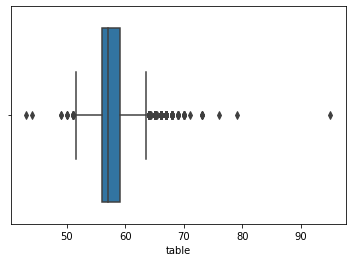

In [151]:
sns.boxplot(x = df_table)

In [152]:
aykiri_tf = df_table < (alt_sinir)
df_table[aykiri_tf]

1515     51.0
3238     50.1
3979     51.0
4150     51.0
5979     49.0
7418     50.0
8853     51.0
11368    43.0
22701    49.0
25179    50.0
26387    51.0
33586    51.0
35633    44.0
45798    51.0
46040    51.0
47630    51.0
Name: table, dtype: float64

In [153]:
df_table.mean()

57.45718390804603

In [0]:
df_table[aykiri_tf]  = df_table.mean() # kolay bir şekilde dftablenin aykiri_tf şartına
# uyanları df_tablenin ortlamasına eşitledim.

In [155]:
df_table[aykiri_tf]


1515     57.457184
3238     57.457184
3979     57.457184
4150     57.457184
5979     57.457184
7418     57.457184
8853     57.457184
11368    57.457184
22701    57.457184
25179    57.457184
26387    57.457184
33586    57.457184
35633    57.457184
45798    57.457184
46040    57.457184
47630    57.457184
Name: table, dtype: float64

In [156]:
df_table = df["table"].copy()
df_table.describe()

count    53940.000000
mean        57.457184
std          2.234491
min         43.000000
25%         56.000000
50%         57.000000
75%         59.000000
max         95.000000
Name: table, dtype: float64

In [0]:
aykiri_tf = (df_table <(alt_sinir)) | (df_table > (ust_sinir) )

In [0]:
df_table[aykiri_tf] = df_table.mean()

In [159]:
df_table[aykiri_tf].head()

2      57.457184
91     57.457184
145    57.457184
219    57.457184
227    57.457184
Name: table, dtype: float64

In [160]:
df_table.describe()
#aykırılardan kurtulunca standart sapma düştü

count    53940.000000
mean        57.374344
std          2.062702
min         51.600000
25%         56.000000
50%         57.000000
75%         59.000000
max         63.500000
Name: table, dtype: float64

In [0]:
# aykırı gözlemler için baskılama yöntemi
# eğer aykrı gözlemlerin gerçekten aykırı gözlem olmayabileceği veya verisetinin 
# aykırılıklarını da göz önünde bulundurmak istediğimizde baskılam yöntemi kullanırız
# baskılama yöntemi: alt sınırın altında kalan aykrı değerleri alt sınıra eşitleriz
            #        üst sınırın üstünde kalan aykrı değerleri üst sınıra eşitleriz.

In [0]:
aykiri_tf = (df_table <(alt_sinir)) 

In [0]:
aykiri_tf = (df_table <(alt_sinir)) 
df_table[aykiri_tf] = alt_sinir      

In [170]:
df_table[aykiri_tf] 

Series([], Name: table, dtype: float64)

In [0]:
aykiri_ust_tf = df_table > (ust_sinir)

In [172]:
df_table[aykiri_ust_tf] = ust_sinir
df_table[aykiri_ust_tf] 

Series([], Name: table, dtype: float64)

In [173]:
df_table[aykiri_ust_tf]
#normaldealt sınır veya üst sınır döner hata var şu an salla

Series([], Name: table, dtype: float64)

### Çok Değişkenli Aykırı Gözlem Analizi

#### Local Outlier Factor

In [0]:
# noktaların etrafındaki komşularının yoğunluğuna göre aykırı gözlem tespiti yapılır.
# nokaların çevresindeki komşu sayısını belirlemek için değerlerine göre uzklık hesaplamaları yapılması gerekiyor
# böylece noktanın etrafına çizilecek daire ile komşuluk sayısları belirlenmiş oluyor.
# bunlar noktaların değerine göre belirleniyor.
# bunun üzerinden yoğunluk hesaplanıyor.
# yoğunluğu belirlemek için LOF skoru belirleniyor.

In [174]:
# bunu denemek için bir veriseti oluşturalım.
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor

np.random.seed(42) #random alacağımız verinin sürekli değişmemesi için
X_inliers = np.random.normal(70, 3,(100, 2)) # ortalaması 70  varyansı 3 olarak dağılan 100 elemanlı 2 boyutlu random veri seti.
# X_inliers yani aykrı olmayan X olarak  isimlendirdim.
X_inliers = np.r_[X_inliers +10, X_inliers -10] # sunni bir şekilde görseleştirme işleminde lokalliğin nsaıl olacağına yönelik bir yapı oluşturduk.
# r_  kullanmamızın sebebi index problemlerine takılmadan array oluşturmaktır.

print(X_inliers.shape) # kaç gözlem ve  bunu gördük
print(X_inliers[:3,:2]) # 3 satır ve 2 sütunu gözlemledik.


(200, 2)
[[81.49014246 79.5852071 ]
 [81.94306561 84.56908957]
 [79.29753988 79.29758913]]


In [0]:
X_outliers = np.random.uniform(low=15, high=130,size=(20,2)) #aykırılardan oluşacak X_outliers değişkenini oluşturduk. 
# tek düze(uniform) dağlımlı rast gele 15 ile 130 arasında 20 gözlemden ve 2 değişkenden bir veriseti oluşturduk.

In [176]:
X = np.r_[X_inliers, X_outliers] # iki arrrayi birleştirdim
X[0:3,:]

array([[81.49014246, 79.5852071 ],
       [81.94306561, 84.56908957],
       [79.29753988, 79.29758913]])

In [0]:
# lof skorlarının hesaplanması

In [0]:
skorlar = LocalOutlierFactor(n_neighbors = 20, contamination =0.1) # skorlar değişkenine lof fonksiyonunda komşu sayısını 20 olarak belirledim.
# contamination argümanına 0.1 dedim.

In [178]:
skorlar.fit_predict(X) # instence ettiğim lof fonksiyonunu kullanarak fit_predict fonksiyonunu X üzerine uyguladık.
#böylece skorlama işlemini yaptık.

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

In [0]:
X_score = skorlar.negative_outlier_factor_ #bütün gözlemleri negatif olarak skorldık.
# bunun sebebi radius hesaplarken negatiflik arttıkça bunun radiusa etkisinin o kadar pozitif olmasını sağlayacak bir formül yazmamız.

In [180]:
X_score

array([ -0.99920793,  -1.14732911,  -0.97212675,  -1.32719465,
        -0.96975281,  -0.96802782,  -1.1805622 ,  -1.19797585,
        -1.01561029,  -1.15267042,  -1.21993084,  -1.05831363,
        -0.97110275,  -1.02663395,  -0.96154064,  -1.32250926,
        -1.01699286,  -1.10234974,  -1.19346895,  -1.05776726,
        -1.04856181,  -0.96442079,  -1.15375777,  -1.04363184,
        -1.13388154,  -0.97715087,  -0.98044628,  -1.13725117,
        -0.98956357,  -1.02785428,  -0.95728791,  -1.16047442,
        -1.13796262,  -0.99593571,  -0.99185635,  -1.13931637,
        -1.14278418,  -1.91696252,  -0.95681998,  -1.19901531,
        -0.94185764,  -1.25760245,  -1.01278495,  -1.11585158,
        -0.98451094,  -0.99655791,  -0.97848957,  -1.1047896 ,
        -0.99211614,  -0.96275604,  -1.09599368,  -0.97642952,
        -0.9472918 ,  -1.43796858,  -0.963528  ,  -1.28400084,
        -1.46986045,  -0.94456349,  -1.04606649,  -1.16724676,
        -1.0681155 ,  -1.29733998,  -1.33698889,  -1.06

In [181]:
X_score.mean()

-1.6850227435158005

In [182]:
X_score.std()

2.140119050235338

In [183]:
np.sort(X_score)[0:10]

array([-15.3785652 , -11.57669644, -10.75276599, -10.24101046,
       -10.07364152,  -9.64406264,  -9.34229978,  -9.26256027,
        -9.06812573,  -8.51275904])

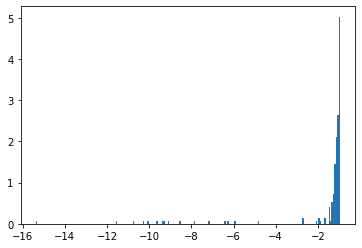

In [184]:
plt.hist(X_score, bins = "auto",density = True) # skorları görselleştirdik
plt.show()

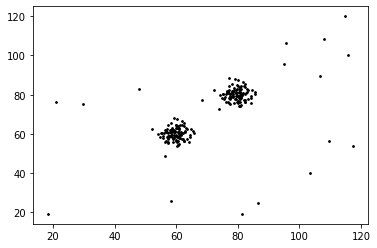

In [185]:
plt.scatter(X[:,0], X[:,1], color = "k", s= 3, label ="Gözlem Birimleri")
# noktaları görselleştirdik

In [0]:
radius = (X_score.max() - X_score) / (X_score.max()-X_score.min())
# yukarda X_score negatif aldık. şimdi burdaki formülün payında X_score önüne -  koyduk
# ve radius u yani halkanın boyunu hesapladık. X _score ne kadar negatifse radiusa etkisi o kadar pozitif oluyor.
# böylece negatifliği az olan aykırı gözlem olmazken çok negatif olan daha aykırı gözlem oluyor.

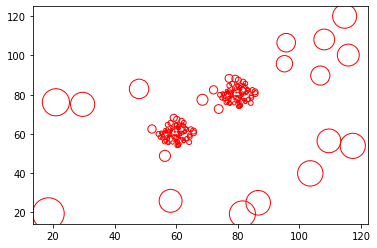

In [188]:
plt.scatter(X[:,0],X[:,1],s = 1000*radius, edgecolors = "r",
           facecolors="none",label ="LOF skorları")
# s ifdesi halkaların büüklüğünü veriyor radius ile oranlarını hesaplamıitık 1000 ile görüntüyü büyüttük.
# legend ayarlarıyla isim nokte vb. şeyleri ayarlayabiliriz.

In [0]:
# çok değişkenli verisetlerimiz olduğunda görselleştirmeyip direk lof skorlarını hesaplayıp direk 
# işlemlerimizi skorlar üzerinden gerçekleştiririz.
# eğer çok değişkenleri verisetini görsellleştirmek istersek temel bileşen analiziyle
# iki değişkene indirgeyip sonra bunu yaparsak yapabiliriz

In [0]:
# Çok Değişkenli Aykırı Gözlemlerin Yakalanması

In [191]:
X[0:3]

array([[81.49014246, 79.5852071 ],
       [81.94306561, 84.56908957],
       [79.29753988, 79.29758913]])

In [192]:
np.sort(X_score)[0:9] # 0 dan 9 a kadar index olrak lof skorlrını sıraladım.


array([-15.3785652 , -11.57669644, -10.75276599, -10.24101046,
       -10.07364152,  -9.64406264,  -9.34229978,  -9.26256027,
        -9.06812573])

In [0]:
esik_deger = np.sort(X_score)[9] # 10. iindexi kendimiz  eşik değer olarak belirlediğimizi düşünelim

In [194]:
(X_score> esik_deger)[200:220] # x score ün bazı elemanlarının eşik değerden büyük olup olmamasını sorguladık

array([ True,  True,  True,  True, False,  True,  True,  True, False,
       False, False,  True,  True, False, False, False, False, False,
       False,  True])

In [0]:
tf_vektor=(X_score> esik_deger) # yaptığım sorguyu tf_vector değişkenine atadım. bi önemi yok gösterdim. sadece

In [196]:
df= X.copy()
df = X[X_score>esik_deger]
#esik değerden büyük olanlar aykırı olmayanlardır çünkü eşik değer skordan olduğu için zaten negatifitir.
# negatifliği az olanlar skoru küçük olanlar ve haliyle aykırı olmayanlar.
# aykırılardan arınmış bir  verinin değerleri
df

array([[ 81.49014246,  79.5852071 ],
       [ 81.94306561,  84.56908957],
       [ 79.29753988,  79.29758913],
       [ 84.73763845,  82.30230419],
       [ 78.59157684,  81.62768013],
       [ 78.60974692,  78.60281074],
       [ 80.72588681,  74.26015927],
       [ 74.8252465 ,  78.31313741],
       [ 76.96150664,  80.942742  ],
       [ 77.27592777,  75.7630889 ],
       [ 84.39694631,  79.3226711 ],
       [ 80.20258461,  75.72575544],
       [ 78.36685183,  80.33276777],
       [ 76.54701927,  81.12709406],
       [ 78.19808393,  79.12491875],
       [ 78.19488016,  85.55683455],
       [ 79.95950833,  76.82686721],
       [ 82.46763474,  76.33746905],
       [ 80.62659079,  74.12098963],
       [ 76.01544185,  80.59058371],
       [ 82.21539974,  80.51410484],
       [ 79.65305515,  79.09668891],
       [ 75.56443403,  77.84046737],
       [ 78.61808369,  83.17136668],
       [ 81.03085487,  74.71087953],
       [ 80.97225191,  78.84475316],
       [ 77.969234  ,  81.83502887],
 

In [197]:
X[X_score<esik_deger] # aykırı gözlemlere eriştik

array([[114.71331664, 120.02266354],
       [117.35061431,  53.86944304],
       [ 81.50221621,  19.13336149],
       [ 18.50752874,  19.29504171],
       [109.59906448,  56.42192376],
       [ 29.61195895,  75.05797491],
       [103.54925861,  39.81941816],
       [ 86.63240472,  24.81495847],
       [ 20.94339793,  76.10578263]])

## Eksik Veri -Hızlı Çözüm

In [198]:
import pandas as pd
import numpy as np

V1 = np.array([1,3,6,np.NaN,7,1,np.NaN,9,15])
V2 = np.array([7,np.NaN,5,8,12,np.NaN,2,3,9])
V3 = np.array([np.NaN,12,5,6,14,7,np.NaN,2,31])

df = pd.DataFrame({"V1": V1,
                  "V2":V2,
                  "V3":V3})
df

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,NaN,2.0,NaN
7,9.0,3.0,2.0
8,15.0,9.0,31.0


In [199]:
df.isnull().sum() # nerde kaç eksik var elde ettik

V1    2
V2    2
V3    2
dtype: int64

#### Eksiklerden kurtulmak için 1- silmek

In [200]:
dff = df.dropna() # 1 tane eksik değer için bile tüm gözlem birimi silindi.
dff

,V1,V2,V3
2,6.0,5.0,5.0
4,7.0,12.0,14.0
7,9.0,3.0,2.0
8,15.0,9.0,31.0


#### Eksiklerden kurtulmak için 2-basit değer atamak

In [201]:
df["V1"].mean()

6.0

In [202]:
df["V1"].fillna(df["V1"].mean()) # eksik gözlemleri ortalamasıyla doldurduk.

0     1.0
1     3.0
2     6.0
3     6.0
4     7.0
5     1.0
6     6.0
7     9.0
8    15.0
Name: V1, dtype: float64

In [203]:
df["V1"].fillna(0) #Na ler bazen 0 anlamına gelebilir. Bunun farkında olarak bazen 0 atanabilir.

0     1.0
1     3.0
2     6.0
3     0.0
4     7.0
5     1.0
6     0.0
7     9.0
8    15.0
Name: V1, dtype: float64

In [205]:
df.apply(lambda x: x.fillna(x.mean(),axis = 0)) # apply ile dolaş dedik lambda ile fonksiyon yazdık.
# fonksiyonda  fillna ile ortalama ile doldurduk.


,V1,V2,V3
0,1.0,7.000000,11.0
1,3.0,6.571429,12.0
2,6.0,5.000000,5.0
3,6.0,8.000000,6.0
4,7.0,12.000000,14.0
5,1.0,6.571429,7.0
6,6.0,2.000000,11.0
7,9.0,3.000000,2.0
8,15.0,9.000000,31.0


### Eksik Veriyi Saptamak

In [206]:
import pandas as pd
import numpy as np

V1 = np.array([1,3,6,np.NaN,7,1,np.NaN,9,15])
V2 = np.array([7,np.NaN,5,8,12,np.NaN,2,3,9])
V3 = np.array([np.NaN,12,5,6,14,7,np.NaN,2,31])

df = pd.DataFrame({"V1": V1,
                  "V2":V2,
                  "V3":V3})
df

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,NaN,2.0,NaN
7,9.0,3.0,2.0
8,15.0,9.0,31.0


In [207]:
df.notnull().sum() # değişkenlerdki eksik olmayanların sayısına eriştik.

V1    7
V2    7
V3    7
dtype: int64

In [208]:
df.isnull().sum().sum() # toplam eksik.

6

In [209]:
df.isnull()

,V1,V2,V3
0,False,False,True
1,False,True,False
2,False,False,False
3,True,False,False
4,False,False,False
5,False,True,False
6,True,False,True
7,False,False,False
8,False,False,False


In [210]:
df[df.isnull().any(axis =1)] # en az birinde eksik değer olan gözlem birimlerini yakaladık.

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
3,NaN,8.0,6.0
5,1.0,NaN,7.0
6,NaN,2.0,NaN


In [211]:
df[df.notnull().all(axis = 1)] # tüm değerleri tam olan gözlem birimlerini yakaladık.

,V1,V2,V3
2,6.0,5.0,5.0
4,7.0,12.0,14.0
7,9.0,3.0,2.0
8,15.0,9.0,31.0


#### Görselleştirme ve Rassallık incelemesi 

In [212]:
!pip install missingno

In [0]:
import missingno as msno
import seaborn as sns

In [214]:
df

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,NaN,2.0,NaN
7,9.0,3.0,2.0
8,15.0,9.0,31.0


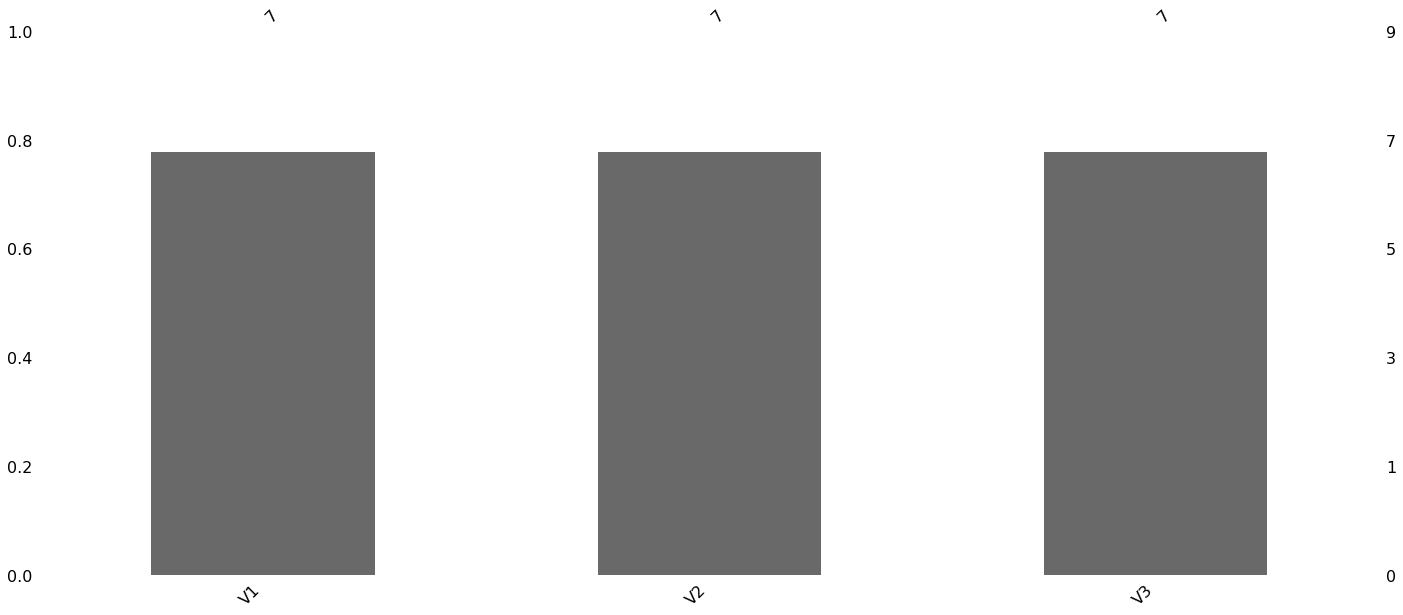

In [215]:
msno.bar(df);
# eksik gözlem sayısının toplam gözlem sayısına oranın göre değişkenlerin 

In [216]:
df.isnull().sum()

V1    2
V2    2
V3    2
dtype: int64

In [217]:
df

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,NaN,2.0,NaN
7,9.0,3.0,2.0
8,15.0,9.0,31.0


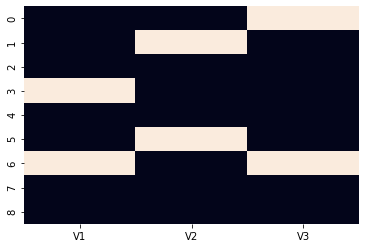

In [218]:
sns.heatmap(df.isnull(), cbar = False)
# eksik gözlemin yapısını ve dağlışını ısı haritasıyla güzel birr şekilde görüyoruz.
# heatmap ile rassallık tespit edilebilir. aralarındaki ilişki göz önüne serilebilir.

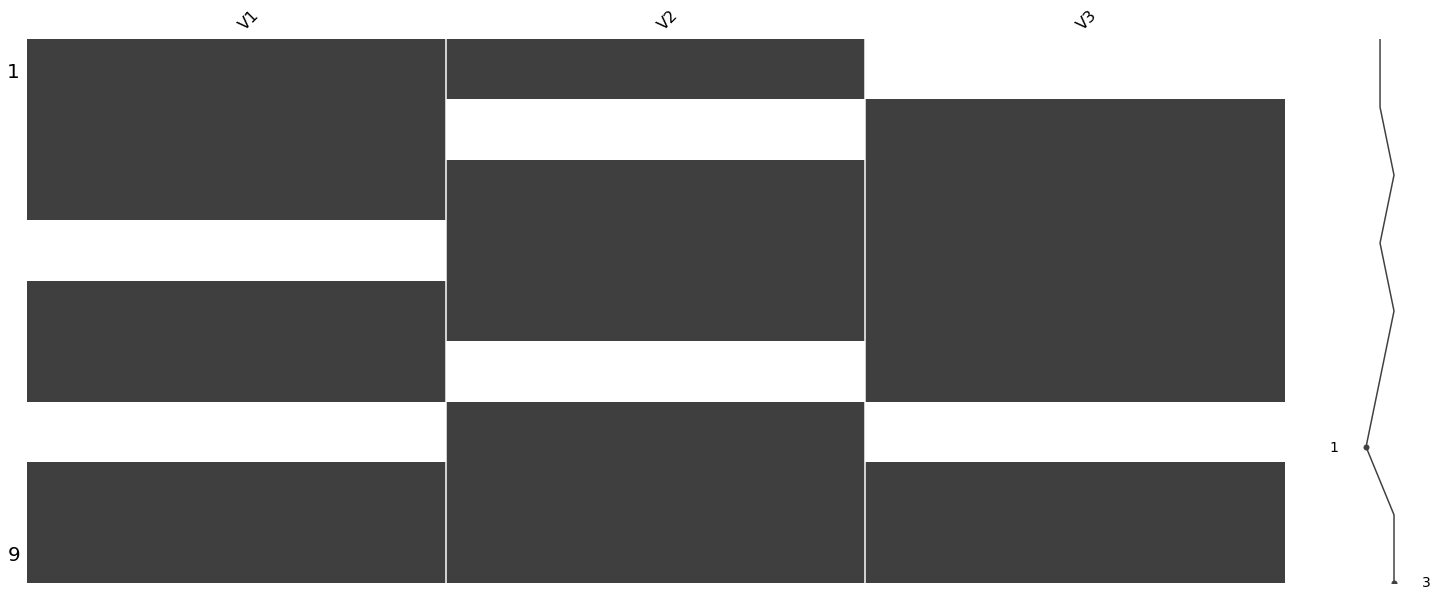

In [219]:
msno.matrix(df) 

In [220]:
df = sns.load_dataset("planets")
df.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


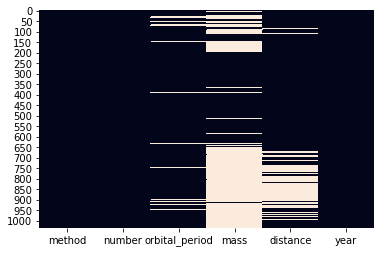

In [221]:
sns.heatmap(df.isnull(), cbar = False)

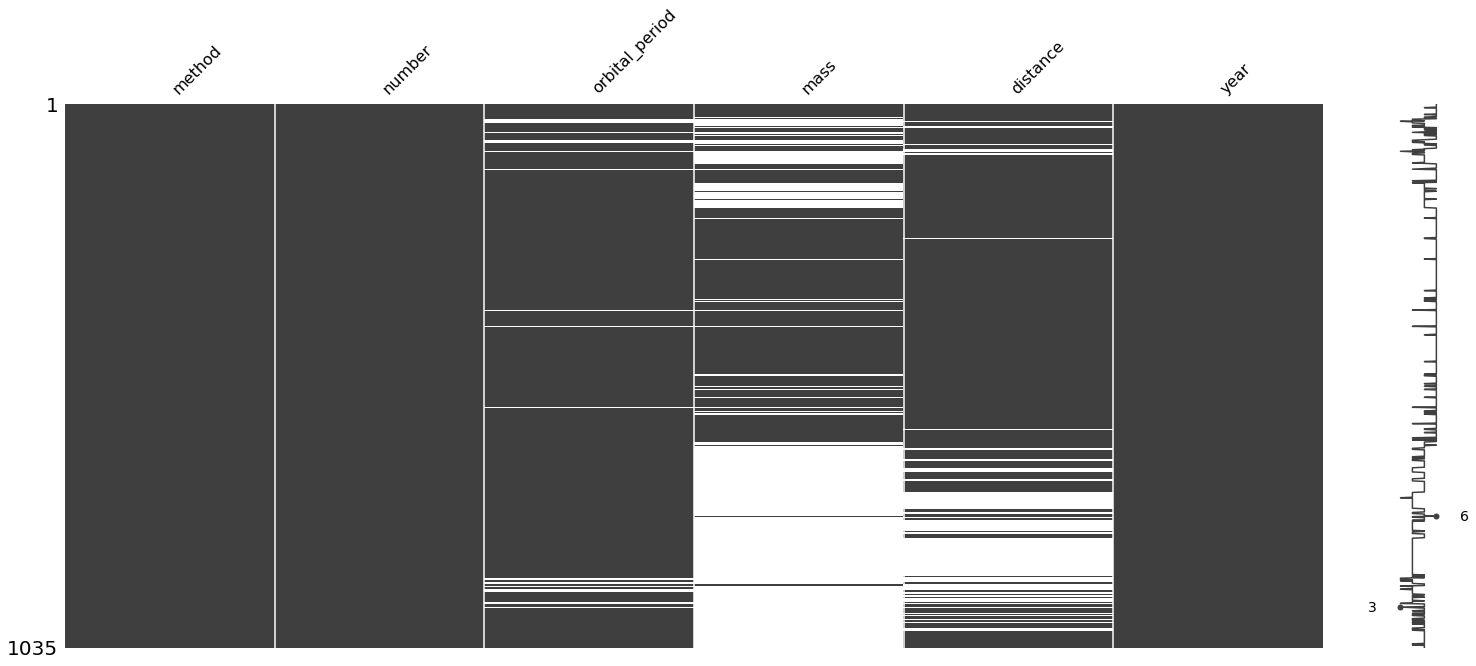

In [222]:
msno.matrix(df)

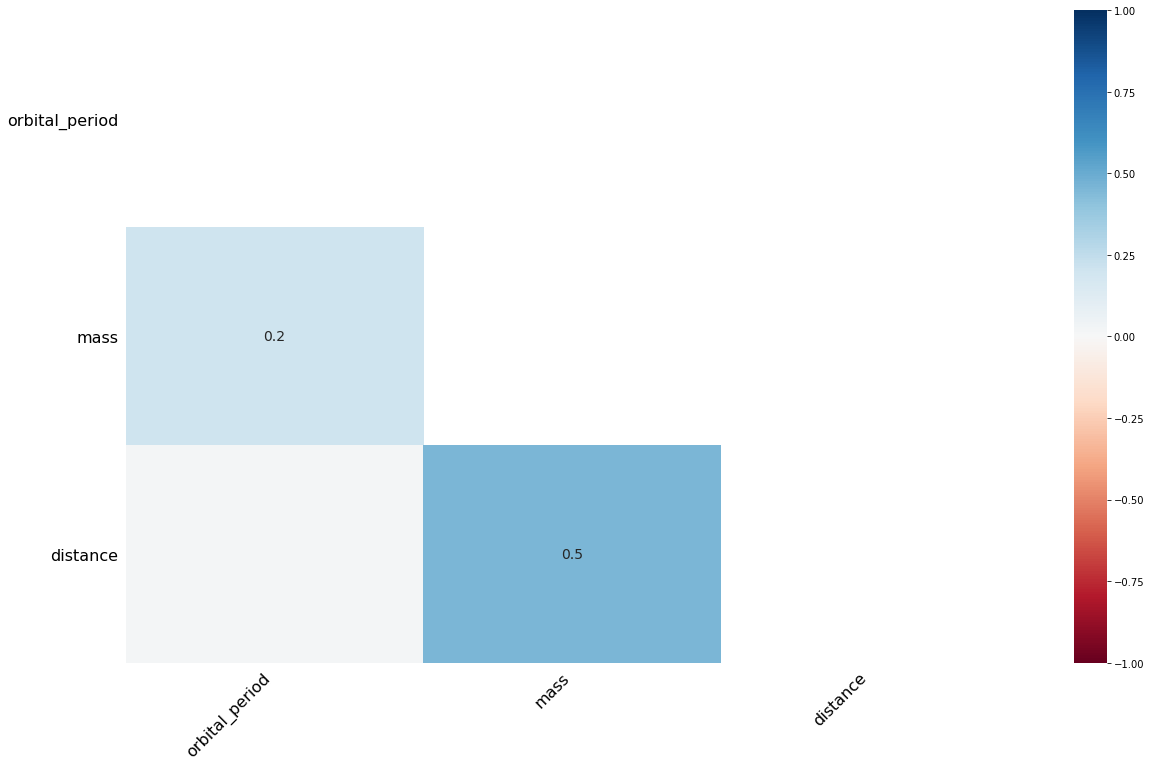

In [223]:
msno.heatmap(df) # nullty korelasyon heatmapı dir. aralarındaki ilişkiyi görmek için kullanılabilir.
# değerler -1 ile 1 arasındadır. eğer 1 ise iki değişkene birlikte hareket ederler ilişkisi vardır tanısı konulur.

# eğer değer -1 ise değişkenlerin birinde eksiklik olacaksa diğerimde olmayacak anlamı çıkarılır.
# eğer  aralarında bir ilişki yoksa üzerinde değer gösterilmez.
# mesela mass ile distance arasınd 0.5 lik pozitif yönlü orta şiddetli bir ilişki var.
# distance ile orbital period arasında bir değer verilmediği için bir ilişki yoktur.
# böylece rassallık tespiti yapmış olduk.

### Eksik Veri Silme Yaklaşımları

In [224]:
import pandas as pd
import numpy as np

V1 = np.array([1,3,6,np.NaN,7,1,np.NaN,9,15])
V2 = np.array([7,np.NaN,5,8,12,2,np.NaN,3,9])
V3 = np.array([np.NaN,12,5,6,14,7,np.NaN,2,31])

df = pd.DataFrame({"V1": V1,
                  "V2":V2,
                  "V3":V3})
df

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,2.0,7.0
6,NaN,NaN,NaN
7,9.0,3.0,2.0
8,15.0,9.0,31.0


In [0]:
# hızlı çözümde birkaç yöntem var.

In [0]:
# bir diğer yaklaşım tüm gözlem birimlerinde aynıanda NaN olanları silmek.

In [227]:
df.dropna(how = "all") # aynı anda hepsi na ise onları sildi.

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,2.0,7.0
7,9.0,3.0,2.0
8,15.0,9.0,31.0


### Kategorik Değişken Kırılımında Değer atama

In [235]:
V1 = np.array([1,3,6,np.NaN,7,1,np.NaN,9,15])
V2 = np.array([7,np.NaN,5,8,12,np.NaN,np.NaN,2,3])
V3 = np.array([np.NaN,12,5,6,14,7,np.NaN,2,31])
V4 = np.array(["IT","IT","IK","IK","IK","IK","IK","IT","IT"])

df = pd.DataFrame(
        {"maas" : V1,
         "V2" : V2,
         "V3" : V3,
        "departman" : V4}        
)

df

,maas,V2,V3,departman
0,1.0,7.0,NaN,IT
1,3.0,NaN,12.0,IT
2,6.0,5.0,5.0,IK
3,NaN,8.0,6.0,IK
4,7.0,12.0,14.0,IK
5,1.0,NaN,7.0,IK
6,NaN,NaN,NaN,IK
7,9.0,2.0,2.0,IT
8,15.0,3.0,31.0,IT


In [236]:
df.groupby("departman")["maas"].mean()

departman
IK    4.666667
IT    7.000000
Name: maas, dtype: float64

In [240]:
df["maas"].fillna(df.groupby("departman")["maas"].transform("mean"))

0     1.000000
1     3.000000
2     6.000000
3     4.666667
4     7.000000
5     1.000000
6     4.666667
7     9.000000
8    15.000000
Name: maas, dtype: float64

### Tahmine Dayalı Değer Atama Yöntemleri

In [243]:
import seaborn as sns
import missingno as msno
df = sns.load_dataset('titanic')
df = df.select_dtypes(include = ['float64', 'int64'])
print(df.head())
df.isnull().sum()

   survived  pclass   age  sibsp  parch     fare
0         0       3  22.0      1      0   7.2500
1         1       1  38.0      1      0  71.2833
2         1       3  26.0      0      0   7.9250
3         1       1  35.0      1      0  53.1000
4         0       3  35.0      0      0   8.0500


survived      0
pclass        0
age         177
sibsp         0
parch         0
fare          0
dtype: int64

In [247]:
!pip install ycimpute

In [0]:
from ycimpute.imputer import knnimput

In [249]:
var_names = list(df)
var_names

['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare']

In [0]:
import numpy as np
n_df = np.array(df)

In [251]:
n_df[0:10]

array([[ 0.    ,  3.    , 22.    ,  1.    ,  0.    ,  7.25  ],
       [ 1.    ,  1.    , 38.    ,  1.    ,  0.    , 71.2833],
       [ 1.    ,  3.    , 26.    ,  0.    ,  0.    ,  7.925 ],
       [ 1.    ,  1.    , 35.    ,  1.    ,  0.    , 53.1   ],
       [ 0.    ,  3.    , 35.    ,  0.    ,  0.    ,  8.05  ],
       [ 0.    ,  3.    ,     nan,  0.    ,  0.    ,  8.4583],
       [ 0.    ,  1.    , 54.    ,  0.    ,  0.    , 51.8625],
       [ 0.    ,  3.    ,  2.    ,  3.    ,  1.    , 21.075 ],
       [ 1.    ,  3.    , 27.    ,  0.    ,  2.    , 11.1333],
       [ 1.    ,  2.    , 14.    ,  1.    ,  0.    , 30.0708]])

In [252]:
n_df.shape

(891, 6)

In [253]:
dff = knnimput.KNN(k = 4).complete(n_df)

Imputing row 1/891 with 0 missing, elapsed time: 0.135
Imputing row 101/891 with 0 missing, elapsed time: 0.136
Imputing row 201/891 with 0 missing, elapsed time: 0.137
Imputing row 301/891 with 1 missing, elapsed time: 0.138
Imputing row 401/891 with 0 missing, elapsed time: 0.139
Imputing row 501/891 with 0 missing, elapsed time: 0.140
Imputing row 601/891 with 0 missing, elapsed time: 0.141
Imputing row 701/891 with 0 missing, elapsed time: 0.142
Imputing row 801/891 with 0 missing, elapsed time: 0.143


In [254]:
type(dff)

numpy.ndarray

In [0]:
import pandas as pd
dff = pd.DataFrame(dff, columns = var_names)

In [256]:
type(dff)

pandas.core.frame.DataFrame

In [257]:
dff.isnull().sum()

survived    0
pclass      0
age         0
sibsp       0
parch       0
fare        0
dtype: int64

### Veri Standardizasyonu & Değişken Dönüşümleri

In [0]:
# standartlaştırmak demek veriyi karşılaştırılabilirlik kaygısıyla ele aldığımız zaman bozmadan bir kalıba uydurmak anlamına gelir.
# değişken dönüşümü ise verinin varyasyonu korunarak ölçeğinin değiştirilmesi anlamına gelir.

In [262]:
import numpy as np
import pandas as pd
V1 = np.array([1,3,6,5,7])
V2 = np.array([7,7,5,8,12])
V3 = np.array([6,12,5,6,14])
df = pd.DataFrame(
        {"V1" : V1,
         "V2" : V2,
         "V3" : V3})

df = df.astype(float)
df

,V1,V2,V3
0,1.0,7.0,6.0
1,3.0,7.0,12.0
2,6.0,5.0,5.0
3,5.0,8.0,6.0
4,7.0,12.0,14.0


In [0]:
# değişkenleri ortalaması 0 standart sapması 1 olacak şekilde standartlaştıralım

In [0]:
from sklearn import preprocessing 

In [266]:
preprocessing.scale(df) 
# verinin kıyaslanabilirliği bozulmadı.

array([[-1.57841037, -0.34554737, -0.70920814],
       [-0.64993368, -0.34554737,  0.92742603],
       [ 0.74278135, -1.2094158 , -0.98198051],
       [ 0.27854301,  0.08638684, -0.70920814],
       [ 1.2070197 ,  1.81412369,  1.47297076]])

#### Normalizsyon

In [268]:
preprocessing.normalize(df) # 0 1 aralığında olacak şekilde dönüştürüyor.

array([[0.10783277, 0.75482941, 0.64699664],
       [0.21107926, 0.49251828, 0.84431705],
       [0.64699664, 0.53916387, 0.53916387],
       [0.4472136 , 0.71554175, 0.53665631],
       [0.35491409, 0.60842415, 0.70982818]])

#### Mİn-Max dönüşümü


In [269]:
# bir değişkenin değerlerini istediğimiz iki aralığa dönüştürür.
scaler = preprocessing.MinMaxScaler(feature_range = (10,20))# ölçekleyicimiz.

scaler.fit_transform(df) # burda varyans korundu ancak ölçek değişti daha yayvan oldu mesela ama kendi aralarındaki yayılım korundu.

array([[10.        , 12.85714286, 11.11111111],
       [13.33333333, 12.85714286, 17.77777778],
       [18.33333333, 10.        , 10.        ],
       [16.66666667, 14.28571429, 11.11111111],
       [20.        , 20.        , 20.        ]])

#### Binarize Dönüşüm

In [0]:
# belli bir eşiğe 
binarizer = preprocessing.Binarizer(threshhold = 5).fit(df)
binarizer.transform(df)
# 5 den küçük olanlar 0 dönecek

#### 0-1 Dönüşümü

In [0]:
# kategorik değişkeni 1 ve 0 gibi numerik değerlere çevirerek işlemlerimizde fayda sağlayabiliyor.

In [0]:
import seaborn as sns
tips = sns.load_dataset("tips")
df = tips.copy()
df_l = df.copy()
# amacım burdaki cinsiyet değişkenini 0 ve 1 e çevirmek.

In [0]:

df_l["yeni_sex"] = df_l["sex"].cat.codes
# burda oluşturacağımız yeni değişken kategorisi 1 ve 0 a çevrilecektir.

In [272]:
lbe = preprocessing.LabelEncoder()
df_l["daha_yeni_sex"] = lbe.fit_transform(df["sex"])
df
# ilk yakaladığı değişkene 0 atarken cat.codes ilk yakaladığı değişkene 1 atar sınıflandırma problemi olmamaı için dikkat etmek gerekir.

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


#### 1 ve diğerleri(0) Dönüşümü

In [0]:
# 2 den fazla kategorik değişkenden birini 1 olarak atar diğerlerini 0 olarak atar.

In [0]:
df_l["yeni_gun"] = np.where(df_l["day"].str.contains("Sun"),1,0) # day'lerden Sun olanlara 1 diğerlerine 0.

#### Çok Sınıflı Dönüşüm

In [0]:
lbl = preprocessing.LabelEncoder()

In [0]:
df_l["daha_yeni_gun"] = lbe.fit_transform(df_l["day"])

In [0]:
# bu tarz dönüşümlerde algoritmaların kafası karışabilir. değişkenlerin etkileri bozulmaktadır.çünkü nominal ordinal gibi olur.
# ama değişkenler ordinalse sıkıntı olmaz.
# bu sebeple one hat encoding denen dönüşümü yapmak gerekir.

#### One Hat Dönüşümü ve Dummy Değişken Tuzağı

In [0]:
df_one_hot = df.copy()

In [281]:
pd.get_dummies(df_one_hot, columns = ["sex"],prefix = ["sex"]).head() # kategorik değişken çoklanır aynnı anlama  gelen şeyer dummy değişken tuzaağı olur, dikkatt

,total_bill,tip,smoker,day,time,size,sex_Male,sex_Female
0,16.99,1.01,No,Sun,Dinner,2,0,1
1,10.34,1.66,No,Sun,Dinner,3,1,0
2,21.01,3.50,No,Sun,Dinner,3,1,0
3,23.68,3.31,No,Sun,Dinner,2,1,0
4,24.59,3.61,No,Sun,Dinner,4,0,1


In [284]:
pd.get_dummies(df, columns = ["day"], prefix = ["day"]).head()

,total_bill,tip,sex,smoker,time,size,day_Thur,day_Fri,day_Sat,day_Sun
0,16.99,1.01,Female,No,Dinner,2,0,0,0,1
1,10.34,1.66,Male,No,Dinner,3,0,0,0,1
2,21.01,3.50,Male,No,Dinner,3,0,0,0,1
3,23.68,3.31,Male,No,Dinner,2,0,0,0,1
4,24.59,3.61,Female,No,Dinner,4,0,0,0,1


#### Değişkeni İndexe, İndexi değişkene çevirme


In [0]:
df["yeni_degisken"] = df.index

In [0]:
df["yeni_degisken"] = df.index+10

In [0]:
df.index = df["yeni_degisken"]

In [290]:
df

,total_bill,tip,sex,smoker,day,time,size,yeni_degisken
yeni_degisken,,,,,,,,
10,16.99,1.01,Female,No,Sun,Dinner,2,10
11,10.34,1.66,Male,No,Sun,Dinner,3,11
12,21.01,3.50,Male,No,Sun,Dinner,3,12
13,23.68,3.31,Male,No,Sun,Dinner,2,13
14,24.59,3.61,Female,No,Sun,Dinner,4,14
...,...,...,...,...,...,...,...,...
249,29.03,5.92,Male,No,Sat,Dinner,3,249
250,27.18,2.00,Female,Yes,Sat,Dinner,2,250
251,22.67,2.00,Male,Yes,Sat,Dinner,2,251
